In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [ ]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [ ]:
dest = 'images/grizzly.jpeg'
download_url(ims[0],dest)


Path('images/grizzly.jpeg')

In [ ]:
#pip install --upgrade pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


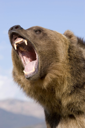

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')


In [ ]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    results = search_images_ddg(f'{o} bear')
    download_images(dest,urls=results)

In [ ]:
fn = get_image_files(path)
fn

(#565) [Path('bears/black/e0dc10c0-adef-48ac-bc7a-b6f0cf4ed8d0.jpg'),Path('bears/black/0ed85443-276c-4a13-81a8-1989a2b9a08f.jpg'),Path('bears/black/1004e2a3-3d33-462d-9469-eb981ca177c1.jpg'),Path('bears/black/cb0a5cfa-29c5-4113-a70a-b46bc85bc744.jpg'),Path('bears/black/2ec4c165-4ac7-4690-8ca0-90e1108f2c2c.jpg'),Path('bears/black/b8968903-05c0-4d97-bd01-347aa467e4cf.jpg'),Path('bears/black/a4b41cc1-8ffa-4a68-a2e7-5a49a5a65281.jpg'),Path('bears/black/bf86fafd-6a8c-4c55-ada6-947837a694bb.jpg'),Path('bears/black/b17a6ec4-85b3-492f-86fb-8125c358c656.jpg'),Path('bears/black/8e91b94f-f852-421d-9ac3-aef794cb85e2.jpg')...]

In [ ]:
failed = verify_images(fn)
failed


(#28) [Path('bears/black/bfce114c-48ba-4b30-b2b9-9d080c1e4042.jpg'),Path('bears/black/08ab9462-49a3-4508-9639-35bd902753fd.jpg'),Path('bears/black/68cf08b4-3c7d-4a2a-9a58-dd56879581e2.jpg'),Path('bears/black/ffc942e3-43a2-4f32-baad-6e432566ce9f.jpg'),Path('bears/grizzly/cae3be09-9800-4d0d-9927-78820211e88f.jpg'),Path('bears/grizzly/98c2e689-6f37-44e9-9c9e-ccac010d7151.jpg'),Path('bears/grizzly/a79de7e3-4a84-4fff-bc45-954bfb22f251.jpg'),Path('bears/grizzly/11cd827b-1d87-4609-848c-c9344f36709e.jpg'),Path('bears/teddy/78f61f7e-ce21-4e6f-b9f9-5401f02b13a6.jpg'),Path('bears/teddy/59be420d-90df-4518-ae48-36e15b12a82d.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#28) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
??verify_images

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items= get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms = Resize(128)
)


In [ ]:
dls = bears.dataloaders(path)


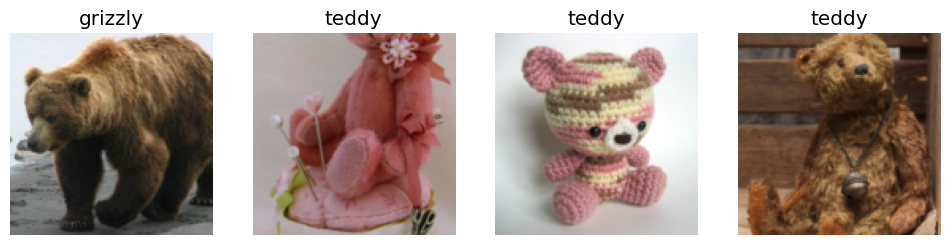

In [ ]:
dls.valid.show_batch(max_n=4,nrows=1)

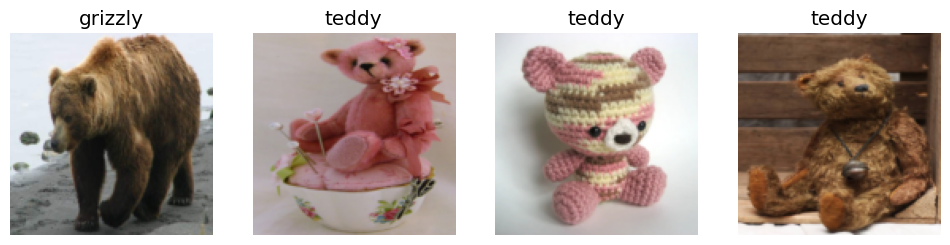

In [ ]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

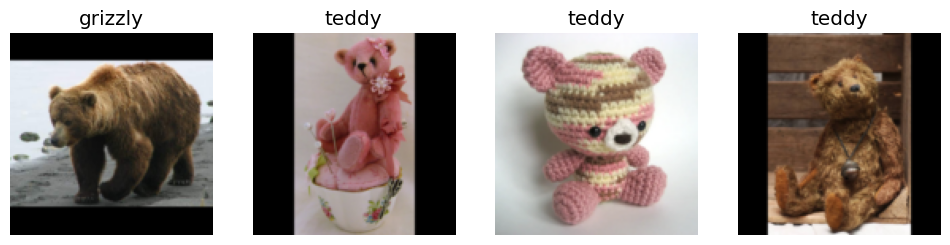

In [ ]:
bears = bears.new(item_tfms = Resize(128, ResizeMethod.Pad,pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

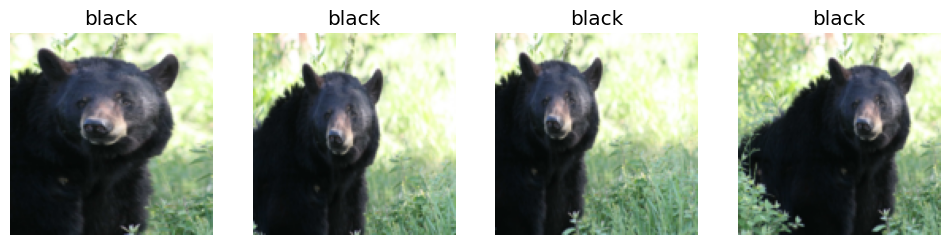

In [ ]:
bears = bears.new(item_tfms =RandomResizedCrop((128,128),min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4,nrows=1,unique=True)

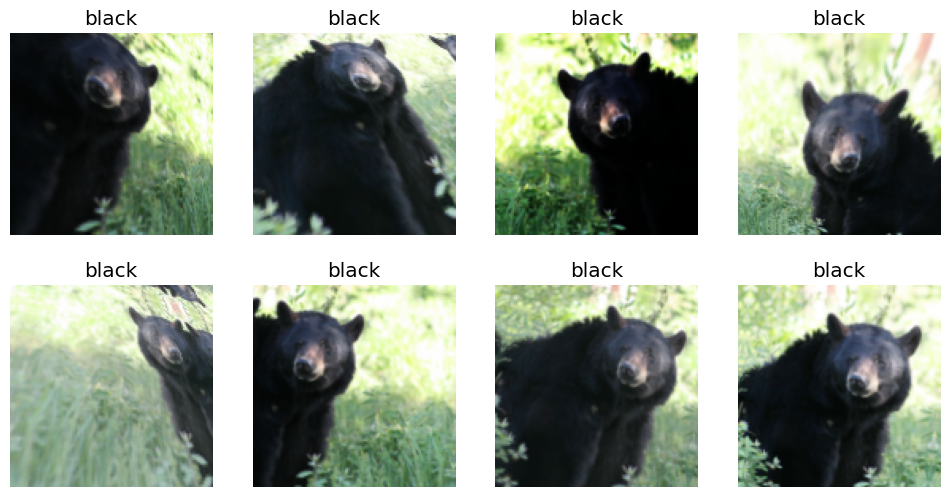

In [ ]:
bears = bears.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

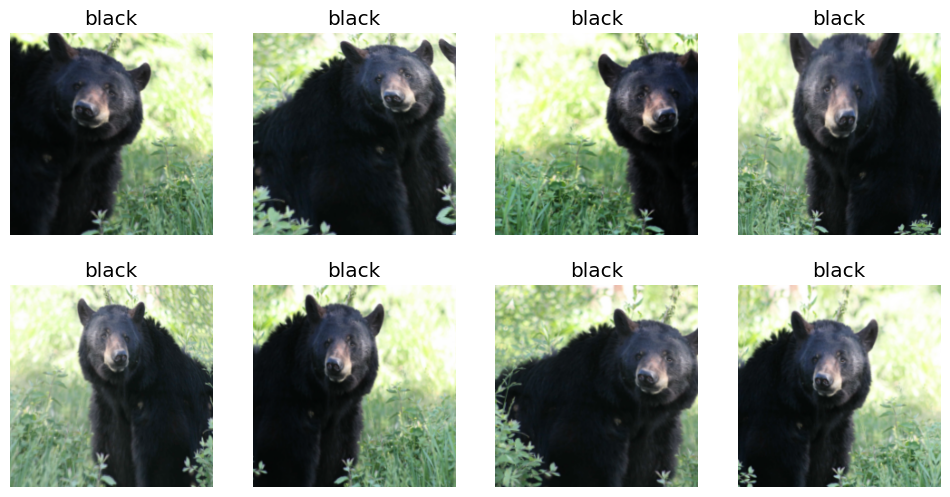

In [ ]:
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [ ]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

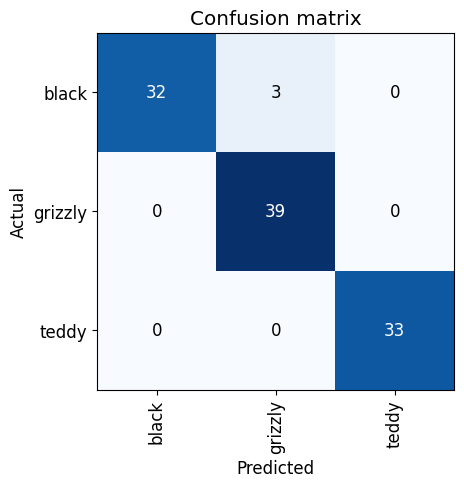

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

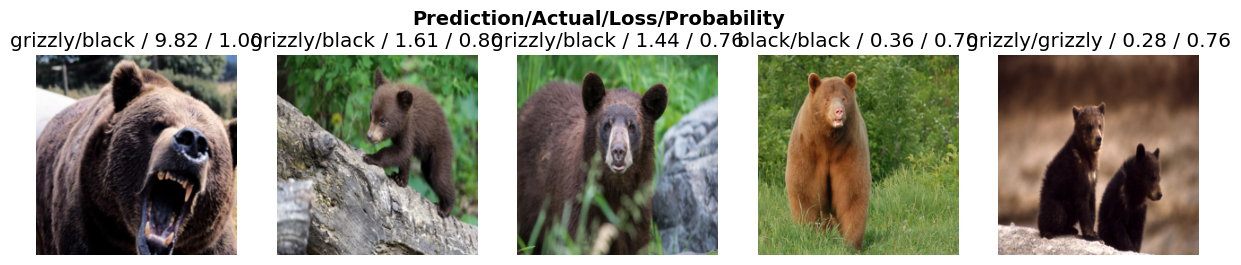

In [ ]:
interp.plot_top_losses(5,nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),path/cat)


In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/grizzly.jpeg')

('grizzly', tensor(1), tensor([2.3607e-03, 9.9755e-01, 9.1265e-05]))

In [ ]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
from ipywidgets import widgets
btn_upload = widgets.FileUpload()

In [ ]:
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)


In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.4f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
VBox([widgets.Label('Select your bear!'),btn_upload, btn_run, out_pl,lbl_pred])

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload)
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.4f}'

btn_run.on_click(on_click_classify)

In [ ]:
def classify_image(change):
  image = gr.inputs.Image(shape=(192,192))
  label = gr.outputs.Label()
  examples = ['images/grizzly.jpg']

intf = gr.Interface(fn = classify_image, inputs = image,outputs = label,examples=examples)
intf.launch(inline=False,share=True)